<a href="https://colab.research.google.com/github/ArvindCar/Preliminaries-ai1-fall2019/blob/master/Copy_of_mnist_keras_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# taken from lukas/ml-class
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.callbacks import Callback
import json

# from wandb.keras import WandbCallback
# import wandb

# run = wandb.init()
# config = run.config







In [0]:
class Config:
  pass

config = Config()
config.optimizer = "adam"
config.epochs = 30
config.hidden_nodes = 30

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_width = X_train.shape[1]
img_height = X_train.shape[2]
print(X_train.shape, y_train.shape)
#X_train = X_train.astype('float32')
#X_train /= 255.
#X_test = X_test.astype('float32')
#X_test /= 255.

# Normalize, change learning rate, play with layer size, batchsize

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
labels = range(10)

num_classes = y_train.shape[1]

(60000, 28, 28) (60000,)


In [0]:
# create model
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=config.optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


# For The Above Code
### Sequential: 
  Allows us to define the multi layered neural network
### Flatten:
  Converts the 28 X 28 screen into a 784 element vector
### Dense:
  This allows us to define the layers and the relation between them
### config.hidden_nodes:
  This tells us how many nodes there are in the second and third layer (first layer is input, fourth layer is output) 
### num_classes:
This tells us the number of final outputs we have(ie 10)
### softmax:
This is a function to make sure that the sum of all the final predictions is =1 

Suppose the final layr has 2 outputs instead of 10:
we get $y_1=e^{w_2*x}/(e^{w_1*x}+e^{w_2*x})$
       $y_2=e^{w_2*x}/(e^{w_1*x}+e^{w_2*x})$
       
Unlike Sigmoid, this gives an equal no of outputs as inputs, whereas sigmoid gives us only 1 output ie = $1/(1+e^{-(w_1*x+w_2*x)})$


In [0]:
import numpy as np

In [0]:
print(np.matrix(X_train[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [0]:
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=config.epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 61us/step - loss: 5.9188 - acc: 0.6250 - val_loss: 5.0364 - val_acc: 0.6819
Epoch 2/30
60000/60000 [==============================] - 3s 53us/step - loss: 4.4244 - acc: 0.7225 - val_loss: 4.1181 - val_acc: 0.7424
Epoch 3/30
60000/60000 [==============================] - 3s 53us/step - loss: 4.2874 - acc: 0.7314 - val_loss: 4.0579 - val_acc: 0.7467
Epoch 4/30
60000/60000 [==============================] - 3s 53us/step - loss: 4.2255 - acc: 0.7360 - val_loss: 4.1585 - val_acc: 0.7393
Epoch 5/30
60000/60000 [==============================] - 3s 52us/step - loss: 4.1940 - acc: 0.7384 - val_loss: 3.9923 - val_acc: 0.7513
Epoch 6/30
60000/60000 [==============================] - 3s 53us/step - loss: 4.1323 - acc: 0.7423 - val_loss: 4.2035 - val_acc: 0.7374
Epoch 7/30
60000/60000 [==============================] - 3s 57us/step - loss: 4.0978 - acc: 0.7447 - val_loss: 3.9622 - val_acc

In [0]:
import matplotlib.pyplot as plt

In [0]:
type(history.history)

dict

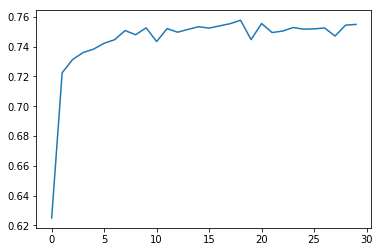

In [0]:
plt.plot(history.epoch, history.history['acc'])

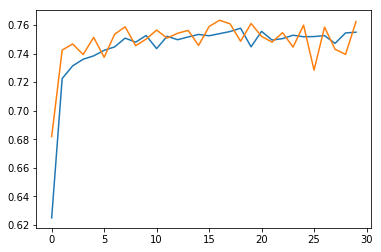

In [0]:
plt.plot(history.epoch, history.history['acc'])
plt.plot(history.epoch, history.history['val_acc'])